## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


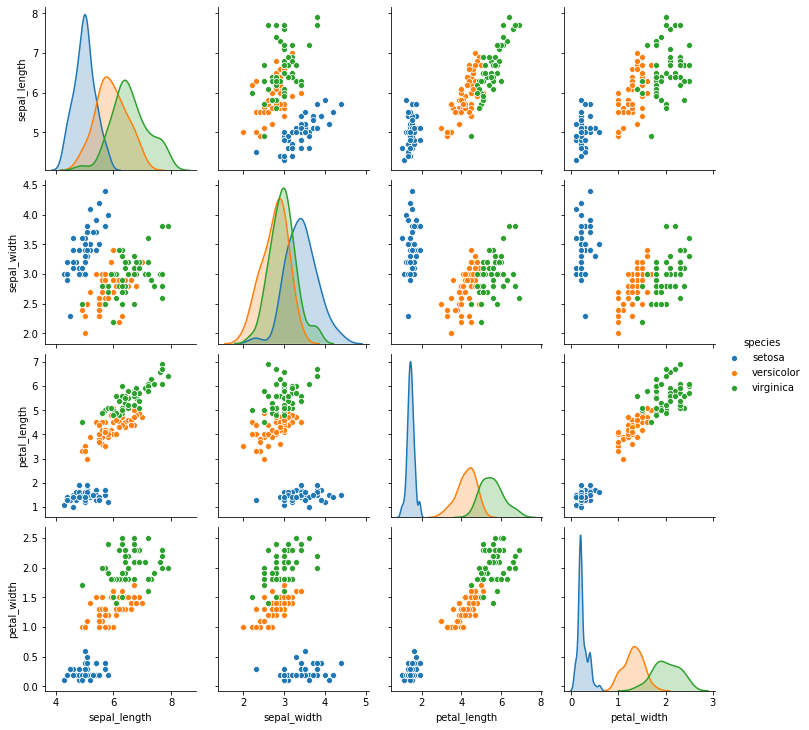

In [8]:
sns.pairplot(iris, hue='species')

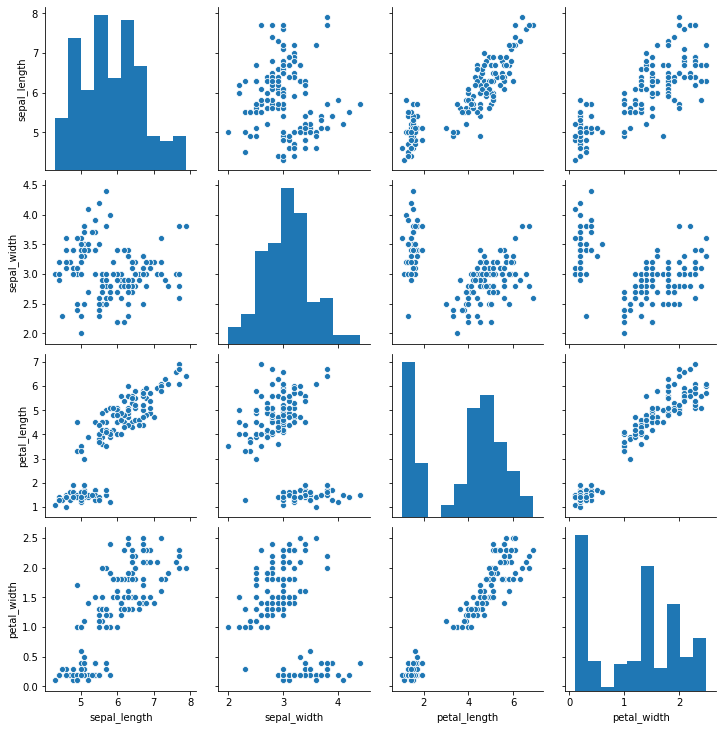

In [9]:
sns.pairplot(iris)

## Creating Cluster

In [10]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [21]:
kmeans.fit(iris.drop('species', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
iris.columns[0:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [23]:
kmeans.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [26]:
cluster2_df = pd.DataFrame(kmeans.cluster_centers_, columns=iris.columns[0:4])
cluster2_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.005660,3.369811,1.560377,0.290566
1,6.301031,2.886598,4.958763,1.695876


In [27]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
iris2 = iris.copy()
iris2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Encode Species

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()
le.fit(iris2['species'])

iris2['species'] = le.transform(iris2['species'])
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
iris2['cluster'] = kmeans.labels_
iris2

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [33]:
iris2[iris2['species']==0]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


In [34]:
iris2[iris2['species']==1]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
50,7.0,3.2,4.7,1.4,1,1
51,6.4,3.2,4.5,1.5,1,1
52,6.9,3.1,4.9,1.5,1,1
53,5.5,2.3,4.0,1.3,1,1
54,6.5,2.8,4.6,1.5,1,1
55,5.7,2.8,4.5,1.3,1,1
56,6.3,3.3,4.7,1.6,1,1
57,4.9,2.4,3.3,1.0,1,0
58,6.6,2.9,4.6,1.3,1,1
59,5.2,2.7,3.9,1.4,1,1


In [35]:
iris2[iris2['species']==2]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
100,6.3,3.3,6.0,2.5,2,1
101,5.8,2.7,5.1,1.9,2,1
102,7.1,3.0,5.9,2.1,2,1
103,6.3,2.9,5.6,1.8,2,1
104,6.5,3.0,5.8,2.2,2,1
105,7.6,3.0,6.6,2.1,2,1
106,4.9,2.5,4.5,1.7,2,1
107,7.3,2.9,6.3,1.8,2,1
108,6.7,2.5,5.8,1.8,2,1
109,7.2,3.6,6.1,2.5,2,1


## Evaluating Clusters

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, fowlkes_mallows_score, completeness_score
from sklearn.metrics.cluster import contingency_matrix

## Contingency Matrix

In [43]:
print('confusion matrix\n', confusion_matrix(iris2['species'], iris2['cluster']))
print('contingency matrix\n', contingency_matrix(iris2['species'], iris2['cluster']))
print(classification_report(iris2['species'], iris2['cluster']))

confusion matrix
 [[50  0  0]
 [ 3 47  0]
 [ 0 50  0]]
contingency matrix
 [[50  0]
 [ 3 47]
 [ 0 50]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       0.48      0.94      0.64        50
           2       0.00      0.00      0.00        50

    accuracy                           0.65       150
   macro avg       0.48      0.65      0.54       150
weighted avg       0.48      0.65      0.54       150



C:\Users\R7891\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
kmeans.inertia_

152.34795176035792

## Fowlkes-Mallows Score
$\displaystyle \frac{TP}{\sqrt{(TP + FP) * (TP + FN)}}$

In [45]:
fowlkes_mallows_score(iris2['species'], iris2['cluster'])

0.7504732564880243

## Completeness Score

In [46]:
completeness_score(iris2['species'], iris2['cluster'])

0.8835142349190769

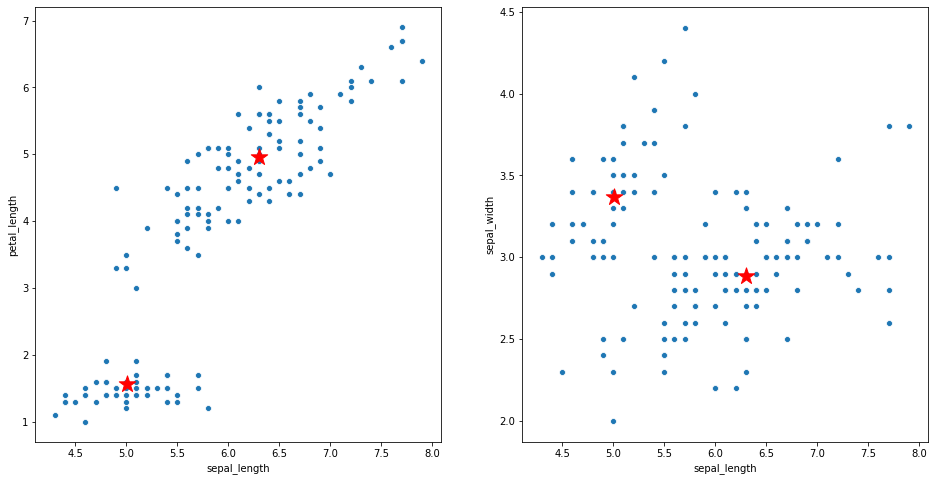

In [49]:
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.scatterplot(x='sepal_length', y='petal_length', data=iris2)
plt.scatter(cluster2_df['sepal_length'], cluster2_df['petal_length'], marker='*', color='red', s=300)

plt.subplot(122)
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris2)
plt.scatter(cluster2_df['sepal_length'], cluster2_df['sepal_width'], marker='*', color='red', s=300)

# Finding the Best K
## Elbow Method

In [50]:
inertia_list = []

for i in range(1,10):
    kmeans_iner = KMeans(n_clusters=i)
    kmeans_iner.fit(iris.drop('species',axis=1))
    inertia_list.append(kmeans_iner.inertia_)

In [51]:
inertia_list

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.054977867477874,
 34.54978881987578,
 30.132440554614472,
 28.114752815639818]

Text(0, 0.5, 'Inertia')

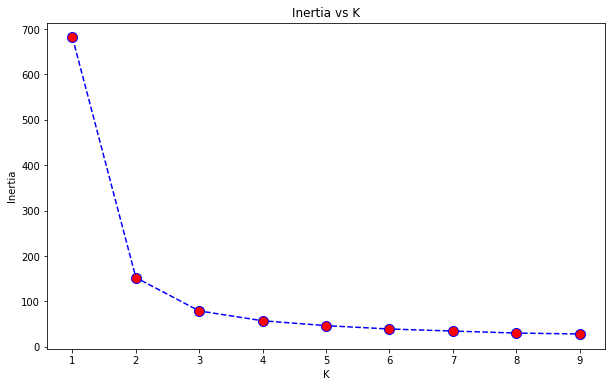

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertia vs K')
plt.xlabel('K')
plt.ylabel('Inertia')

Untuk menilai elbow method kita mencari titik transisi dari yang fluktuatif ke landai

In [53]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(iris.drop('species', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [57]:
kmeans3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
cluster3_df = pd.DataFrame(kmeans3.cluster_centers_, columns=iris.columns[0:4])
cluster3_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [59]:
kmeans3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [60]:
iris3 = iris.copy()
iris3['cluster'] = kmeans3.labels_
iris3

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [61]:
iris3[iris3['species']=='setosa']

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,1
9,4.9,3.1,1.5,0.1,setosa,1


In [62]:
iris3[iris3['species']=='versicolor']

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,2
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0
55,5.7,2.8,4.5,1.3,versicolor,0
56,6.3,3.3,4.7,1.6,versicolor,0
57,4.9,2.4,3.3,1.0,versicolor,0
58,6.6,2.9,4.6,1.3,versicolor,0
59,5.2,2.7,3.9,1.4,versicolor,0


In [64]:
iris3[iris3['species']=='virginica']

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
100,6.3,3.3,6.0,2.5,virginica,2
101,5.8,2.7,5.1,1.9,virginica,0
102,7.1,3.0,5.9,2.1,virginica,2
103,6.3,2.9,5.6,1.8,virginica,2
104,6.5,3.0,5.8,2.2,virginica,2
105,7.6,3.0,6.6,2.1,virginica,2
106,4.9,2.5,4.5,1.7,virginica,0
107,7.3,2.9,6.3,1.8,virginica,2
108,6.7,2.5,5.8,1.8,virginica,2
109,7.2,3.6,6.1,2.5,virginica,2


## Silhouettes Analysis

In [66]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


For n_clusters = 2 The average silhouette_score is: 0.6810461692117467
For n_clusters = 3 The average silhouette_score is: 0.5528190123564102
For n_clusters = 4 The average silhouette_score is: 0.49805050499728803
For n_clusters = 5 The average silhouette_score is: 0.48874888709310643
For n_clusters = 6 The average silhouette_score is: 0.36483400396700366


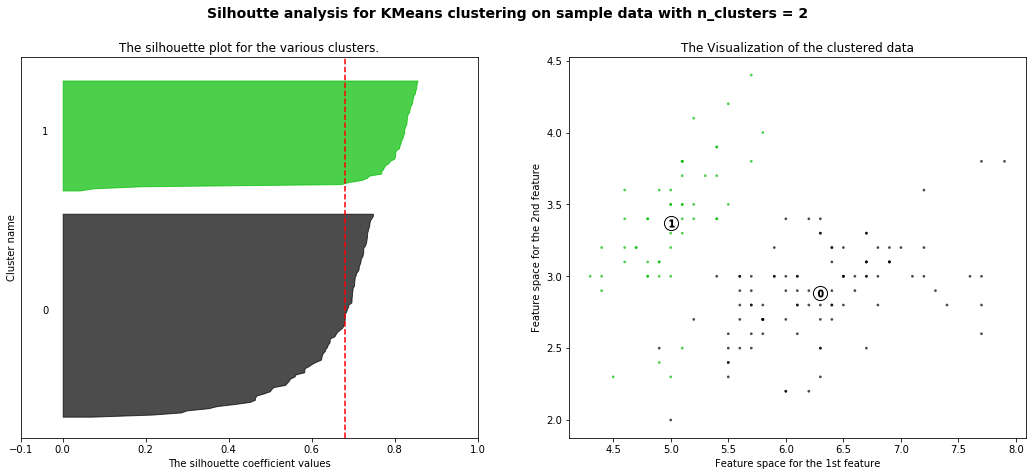

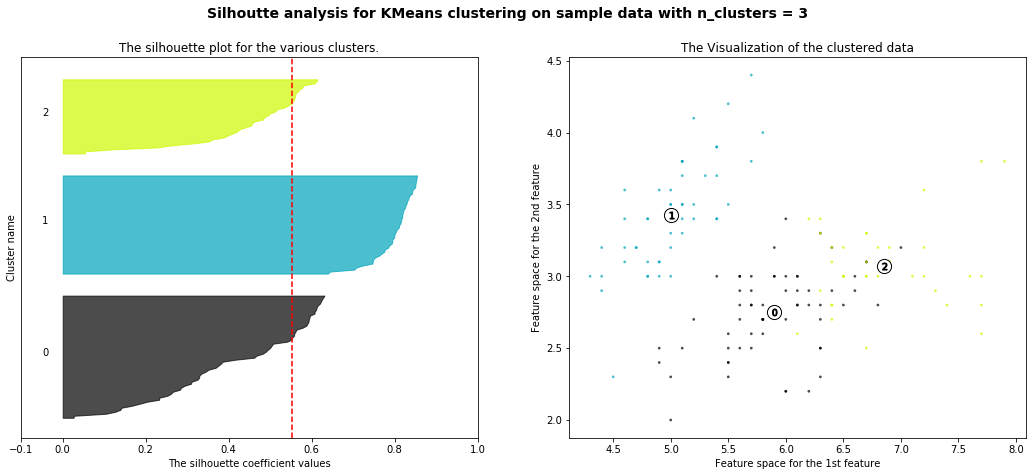

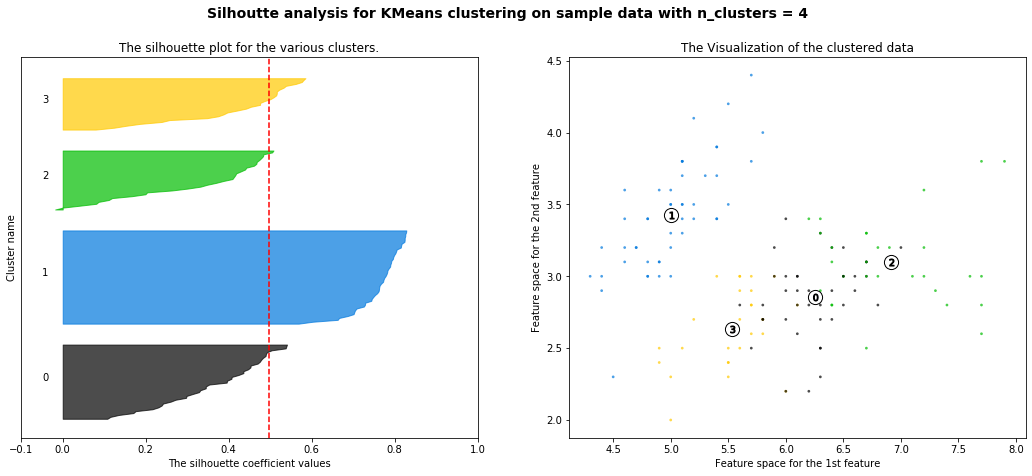

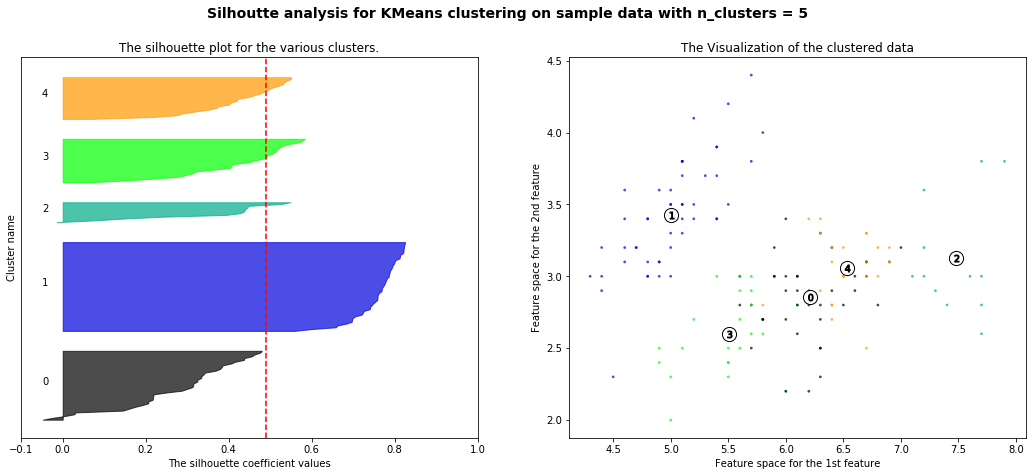

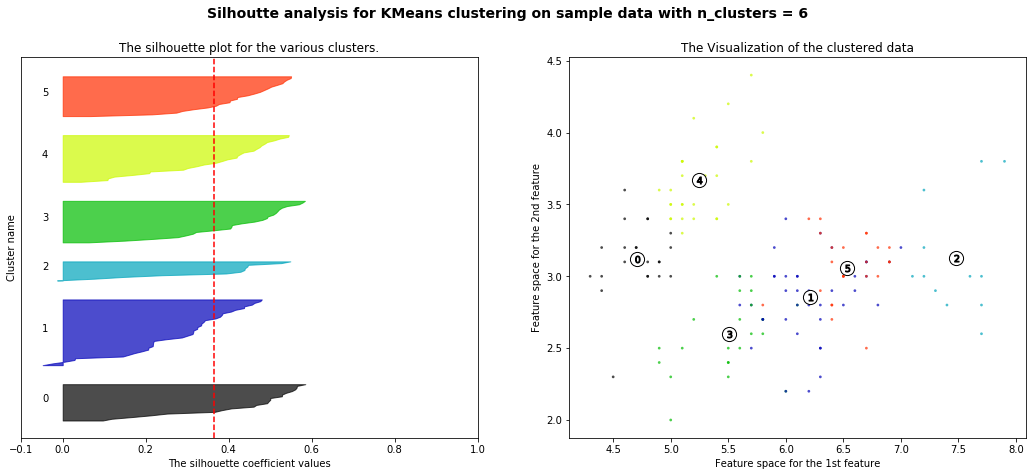

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2,3,4,5,6]
X = iris[iris.columns[0:4]]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # the 1st column / subplot is the silhouettes analysis
    # silhouette analysis punya coeff -1, 1
    # untuk contoh kali ini dibikin -0.1 - 1
    ax1.set_xlim([-0.1,1])
    # memberi jarak silhouettes analysis antar cluster (n_clusters+1)*10
    ax1.set_ylim([0, len(X)+(n_clusters+1)*10])
    
    # Initialize kmeans > `clusterer` dengan random_state=10
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # kita pakai silhouettes_score untuk mendapatkan nilai rata-rata dari setiap sample
    # ini untuk mengetahui seberapa padat tiap cluster
    silhouettes_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouettes_avg)
    
    # menghitung silhouette score untuk setiap sample
    sample_silhouettes_values = silhouette_samples(X, cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouettes_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # named the cluster for each silhouette plot
        ax1.text(-0.05, y_lower+0.5 * size_cluster_i, str(i))
        
        #Compute the new y_lower for next plot
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster name")
    
    # buat vertical line untuk menandakan average silhouettes score
    ax1.axvline(x=silhouettes_avg, color='red', linestyle='--')
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    #2nd plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$'% i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The Visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhoutte analysis for KMeans clustering on sample data "
                 "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
    
plt.show()

https://kapilddatascience.wordpress.com/2015/11/10/using-silhouette-analysis-for-selecting-the-number-of-cluster-for-k-means-clustering/

## Make Blobs

In [71]:
from sklearn.datasets import make_blobs

In [73]:
# Create data
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=2.1, random_state=101)
data

(array([[-6.85686850e+00,  1.05192600e+01],
        [ 6.22920209e+00,  4.95496461e+00],
        [-4.93456363e-01,  3.57276738e+00],
        [ 1.91033384e+00,  1.00438499e+01],
        [ 5.32667672e+00,  7.29579217e+00],
        [-1.11202836e+01, -6.03711599e+00],
        [ 1.75547486e+00,  1.02814326e+01],
        [-2.05898109e+00,  1.41412134e+00],
        [ 7.46375706e-01,  8.50684199e+00],
        [-1.63182560e+00,  3.41897041e+00],
        [-6.57294989e+00,  9.97436621e+00],
        [-1.45298911e+00,  2.68587897e+00],
        [ 2.76920679e+00,  8.11827216e+00],
        [ 2.17366033e+00,  5.16570678e+00],
        [-5.51124744e+00,  9.93271742e+00],
        [-7.15945894e-01, -1.70194635e-01],
        [ 6.35133738e+00,  5.73735071e+00],
        [-2.75380689e+00,  3.75751485e-01],
        [-1.02518023e+01, -2.90826529e+00],
        [-4.65418474e+00,  1.19786434e+01],
        [-1.05797612e+01, -5.52644027e+00],
        [ 7.20934050e-01, -1.25623072e-01],
        [ 2.41237681e+00,  3.917

In [76]:
data[0]

array([[-6.85686850e+00,  1.05192600e+01],
       [ 6.22920209e+00,  4.95496461e+00],
       [-4.93456363e-01,  3.57276738e+00],
       [ 1.91033384e+00,  1.00438499e+01],
       [ 5.32667672e+00,  7.29579217e+00],
       [-1.11202836e+01, -6.03711599e+00],
       [ 1.75547486e+00,  1.02814326e+01],
       [-2.05898109e+00,  1.41412134e+00],
       [ 7.46375706e-01,  8.50684199e+00],
       [-1.63182560e+00,  3.41897041e+00],
       [-6.57294989e+00,  9.97436621e+00],
       [-1.45298911e+00,  2.68587897e+00],
       [ 2.76920679e+00,  8.11827216e+00],
       [ 2.17366033e+00,  5.16570678e+00],
       [-5.51124744e+00,  9.93271742e+00],
       [-7.15945894e-01, -1.70194635e-01],
       [ 6.35133738e+00,  5.73735071e+00],
       [-2.75380689e+00,  3.75751485e-01],
       [-1.02518023e+01, -2.90826529e+00],
       [-4.65418474e+00,  1.19786434e+01],
       [-1.05797612e+01, -5.52644027e+00],
       [ 7.20934050e-01, -1.25623072e-01],
       [ 2.41237681e+00,  3.91705708e+00],
       [-1.

In [77]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [78]:
df = pd.DataFrame(data[0], columns=['feature 1', 'feature 2'])
df['category'] = data[1]
df.head()

,feature 1,feature 2,category
0,-6.856869,10.519260,3
1,6.229202,4.954965,2
2,-0.493456,3.572767,0
3,1.910334,10.043850,2
4,5.326677,7.295792,2


In [79]:
df['category'].value_counts()

3    50
2    50
1    50
0    50
Name: category, dtype: int64

In [81]:
for cat in df['category'].unique():
    print('Category '+str(cat))
    print(round(df[df['category'] == cat].std(), 2))

Category 3
feature 1    2.44
feature 2    2.06
category     0.00
dtype: float64
Category 2
feature 1    2.29
feature 2    2.18
category     0.00
dtype: float64
Category 0
feature 1    2.09
feature 2    2.21
category     0.00
dtype: float64
Category 1
feature 1    1.86
feature 2    2.43
category     0.00
dtype: float64


## Visualisasi Data

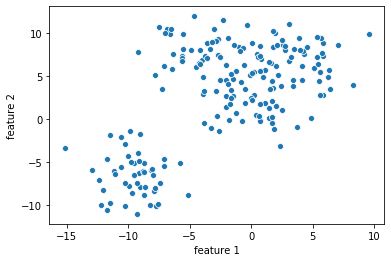

In [83]:
sns.scatterplot(x='feature 1', y='feature 2', data=df)
plt.show()

# Creating cluster

In [85]:
kblobs = KMeans(n_clusters=4, random_state=5)

In [86]:
kblobs.fit(df[['feature 1', 'feature 2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [88]:
kblobs.cluster_centers_

array([[-9.47590218, -6.55935688],
       [ 3.66801588,  7.09758432],
       [-4.27136322,  8.06572359],
       [-0.18739804,  2.10099382]])

In [89]:
kblobs.labels_

array([2, 1, 3, 1, 1, 0, 1, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 0, 2, 0, 3,
       3, 0, 2, 0, 0, 3, 1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 2, 2, 2,
       3, 1, 2, 3, 0, 3, 3, 2, 1, 3, 0, 3, 3, 3, 2, 1, 0, 1, 0, 2, 1, 3,
       0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 1, 3, 2, 3, 3, 0, 1, 0, 3, 3, 3, 2,
       3, 0, 0, 0, 0, 3, 3, 0, 1, 2, 0, 1, 3, 0, 3, 3, 2, 3, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 3, 2, 3, 1, 2, 3, 0, 2, 2, 2,
       3, 0, 0, 2, 1, 3, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 2, 2, 2, 2, 3, 1,
       3, 2, 3, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 0, 1, 1, 1,
       0, 3])

In [91]:
dfkblobs = pd.DataFrame(data[0], columns=['feature 1', 'feature 2'])
dfkblobs['category'] = kblobs.labels_
dfkblobs.head()

,feature 1,feature 2,category
0,-6.856869,10.519260,2
1,6.229202,4.954965,1
2,-0.493456,3.572767,3
3,1.910334,10.043850,1
4,5.326677,7.295792,1


In [93]:
df['cluster'] = kblobs.labels_
df

,feature 1,feature 2,category,cluster
0,-6.856869,10.519260,3,2
1,6.229202,4.954965,2,1
2,-0.493456,3.572767,0,3
3,1.910334,10.043850,2,1
4,5.326677,7.295792,2,1
...,...,...,...,...
195,0.728641,5.568742,0,1
196,7.035746,8.630219,2,1
197,5.373209,9.533332,2,1
198,-9.233897,-3.963860,1,0


In [97]:
df[df['cluster']==1]

,feature 1,feature 2,category,cluster
1,6.229202,4.954965,2,1
3,1.910334,10.043850,2,1
4,5.326677,7.295792,2,1
6,1.755475,10.281433,2,1
8,0.746376,8.506842,2,1
12,2.769207,8.118272,2,1
13,2.173660,5.165707,2,1
16,6.351337,5.737351,2,1
28,3.518013,8.144927,2,1
29,4.095046,4.590499,2,1


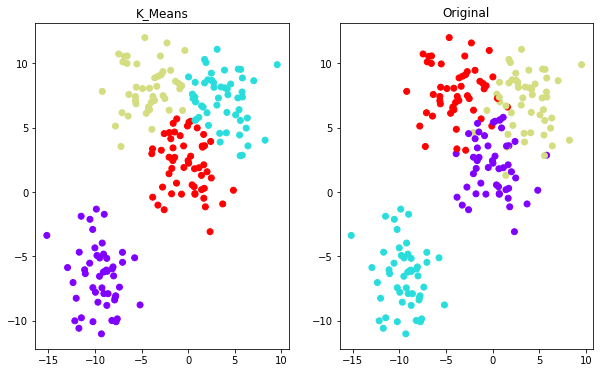

In [99]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
ax1.set_title('K_Means')
ax1.scatter(df['feature 1'], df['feature 2'],c=df['cluster'],cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(df['feature 1'], df['feature 2'],c=df['category'],cmap='rainbow')

## Silhouette Analysis

For n_clusters = 2 The average silhouette_score is: 0.6263760278808035
For n_clusters = 3 The average silhouette_score is: 0.46237692754463394
For n_clusters = 4 The average silhouette_score is: 0.4995551876179987
For n_clusters = 5 The average silhouette_score is: 0.4694235088045053
For n_clusters = 6 The average silhouette_score is: 0.38259960962876477


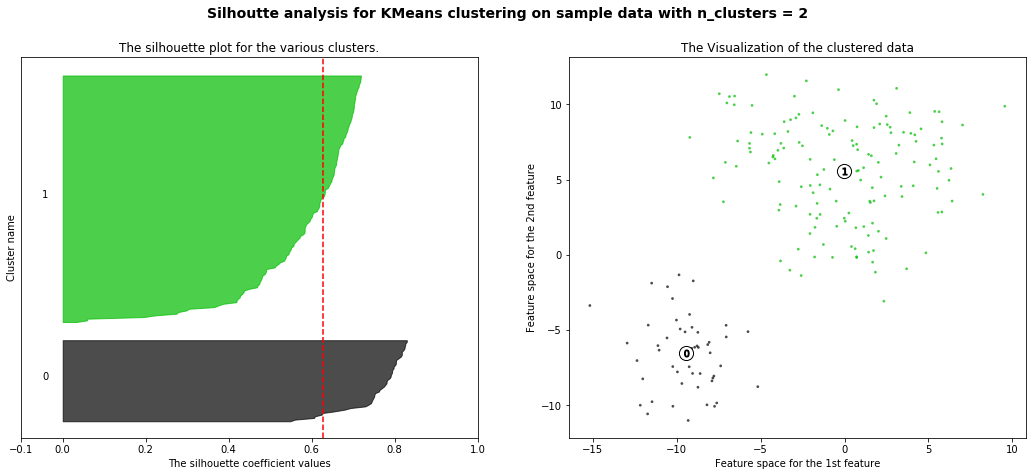

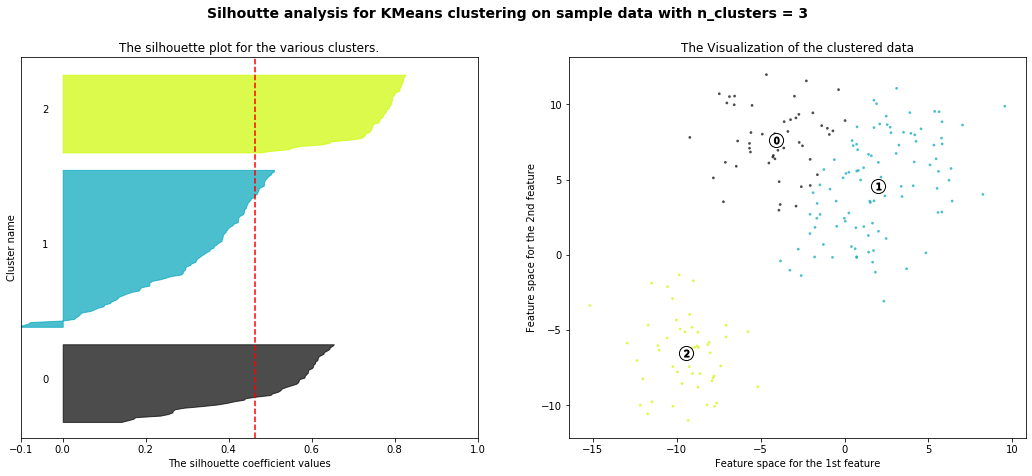

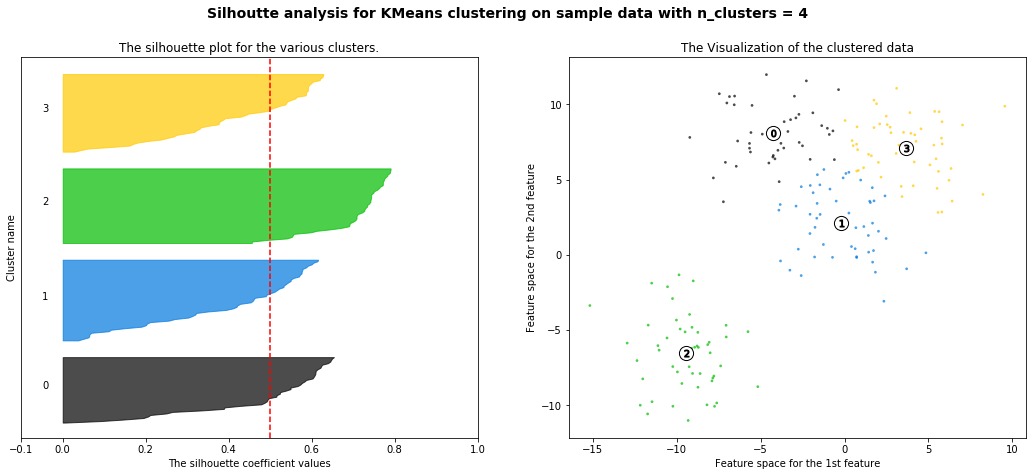

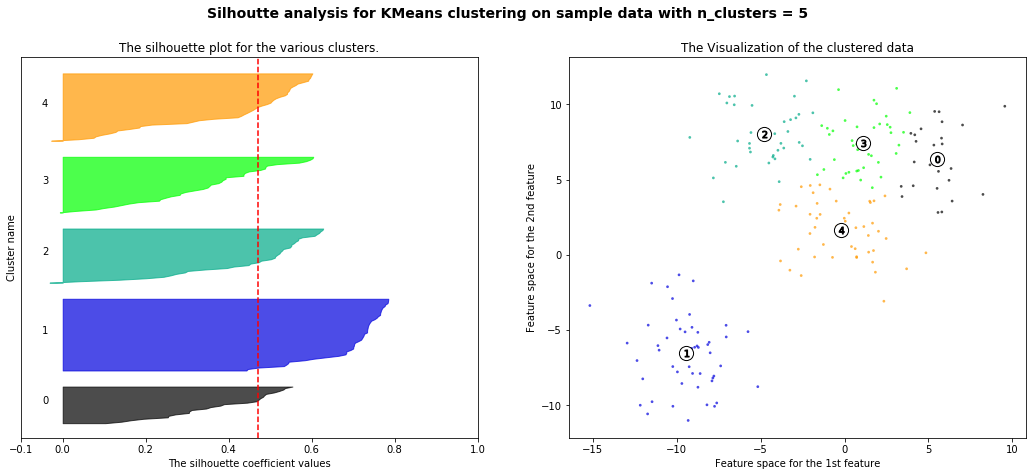

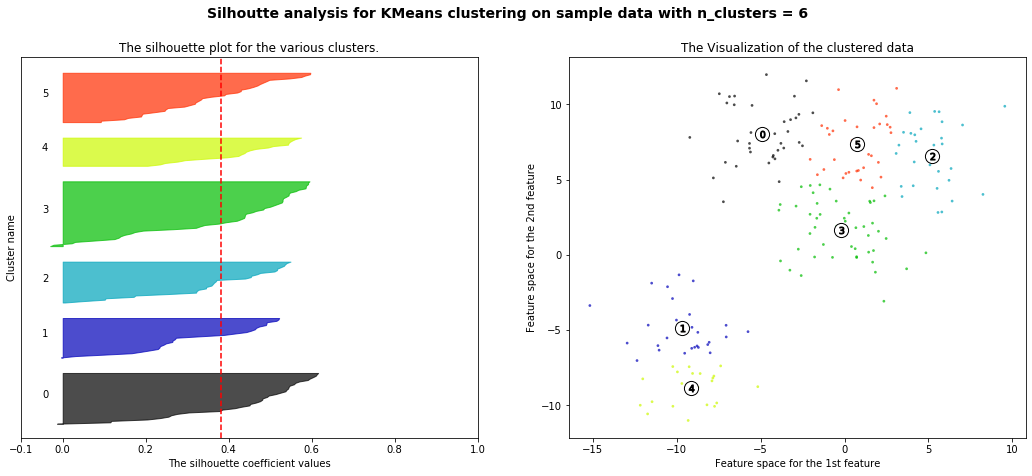

In [100]:
range_n_clusters = [2,3,4,5,6]
X = df[df.columns[0:2]]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # the 1st column / subplot is the silhouettes analysis
    # silhouette analysis punya coeff -1, 1
    # untuk contoh kali ini dibikin -0.1 - 1
    ax1.set_xlim([-0.1,1])
    # memberi jarak silhouettes analysis antar cluster (n_clusters+1)*10
    ax1.set_ylim([0, len(X)+(n_clusters+1)*10])
    
    # Initialize kmeans > `clusterer` dengan random_state=10
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    # kita pakai silhouettes_score untuk mendapatkan nilai rata-rata dari setiap sample
    # ini untuk mengetahui seberapa padat tiap cluster
    silhouettes_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouettes_avg)
    
    # menghitung silhouette score untuk setiap sample
    sample_silhouettes_values = silhouette_samples(X, cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouettes_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        # named the cluster for each silhouette plot
        ax1.text(-0.05, y_lower+0.5 * size_cluster_i, str(i))
        
        #Compute the new y_lower for next plot
        y_lower = y_upper + 10
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster name")
    
    # buat vertical line untuk menandakan average silhouettes score
    ax1.axvline(x=silhouettes_avg, color='red', linestyle='--')
    
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    #2nd plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$'% i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The Visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhoutte analysis for KMeans clustering on sample data "
                 "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
    
plt.show()

In [101]:
inertia_list = []

for i in range(1,11):
    
    k_iner = KMeans(n_clusters=i)
    k_iner.fit(df[['feature 1', 'feature 2']])
    inertia_list.append(k_iner.inertia_)

In [102]:
inertia_list

[13131.24762339095,
 4269.927193298152,
 2734.8231222425056,
 1720.7883129291624,
 1450.952561084623,
 1250.6829015494768,
 1089.4236728388664,
 975.0240781722334,
 846.5403658377987,
 799.1895044643954]

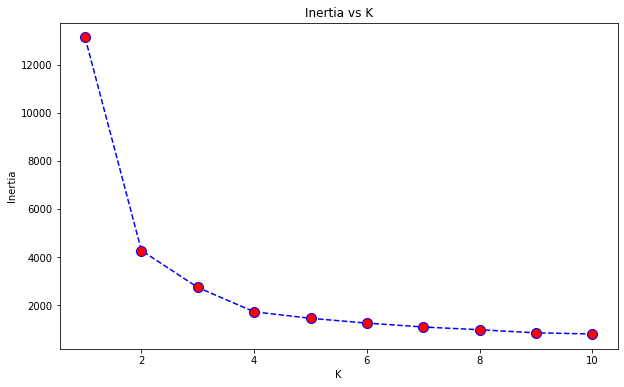

In [103]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertia vs K')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()